### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

### Loading File

In [2]:
df = pd.read_csv(r'F:\MLfolder\ML-Notebooks\car data.csv')

In [3]:
# making a copy of dataset
dfc=df.copy()

### Viewing Dataset

In [4]:
dfc

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


#### Describing the dataset

In [5]:
dfc.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


#### Finding Null values and datatype

In [6]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


* No null values found in any columns.

In [7]:
for i in dfc.columns:
    print('Unique Values in {} are {}'.format(i,len(df[i].unique())))


Unique Values in Car_Name are 98
Unique Values in Year are 16
Unique Values in Selling_Price are 156
Unique Values in Present_Price are 147
Unique Values in Kms_Driven are 206
Unique Values in Fuel_Type are 3
Unique Values in Seller_Type are 2
Unique Values in Transmission are 2
Unique Values in Owner are 3


#### Removing duplicate values

In [8]:
dfc.drop_duplicates(inplace=True)

In [9]:
dfc.shape

(299, 9)

* Two duplicate rows has been removed.

#### Finding Value Counts 

In [10]:
dfc.Fuel_Type.value_counts()

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64

* CNG based cars are the least in number.

In [11]:
dfc.Seller_Type.value_counts()

Dealer        193
Individual    106
Name: Seller_Type, dtype: int64

* Most of the cars are sold via dealers.

In [12]:
dfc.Year.value_counts(ascending=True)

2004     1
2018     1
2003     2
2007     2
2005     4
2006     4
2009     6
2008     7
2010    15
2011    19
2012    23
2013    33
2017    35
2014    38
2016    49
2015    60
Name: Year, dtype: int64

* Most of the cars are not much old.

In [13]:
dfc.Transmission.value_counts()

Manual       260
Automatic     39
Name: Transmission, dtype: int64

* Less cars are automatic.

In [14]:
dfc.Owner.value_counts()

0    288
1     10
3      1
Name: Owner, dtype: int64

* Most of the cars are being sold by the first owner.

### Visualization with respect to Selling_Price

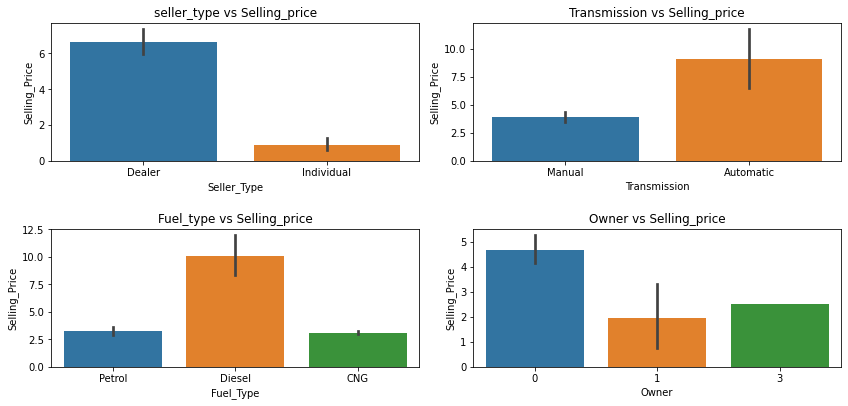

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
axes[0,0].set_title('seller_type vs Selling_price')
sns.barplot(x='Seller_Type',y='Selling_Price',data=dfc,ax=axes[0,0])

axes[1,0].set_title('Fuel_type vs Selling_price')
sns.barplot(x='Fuel_Type',y='Selling_Price',data=dfc,ax=axes[1,0])

axes[0,1].set_title('Transmission vs Selling_price')
sns.barplot(x='Transmission',y='Selling_Price',data=dfc,ax=axes[0,1])

axes[1,1].set_title('Owner vs Selling_price')
sns.barplot(x='Owner',y='Selling_Price',data=dfc,ax=axes[1,1])

plt.tight_layout(pad=2);

##### INFERENCE
Car prices become highest when the car is sold by any dealer,has automatic transmission with fuel_type as Diesel and is being sold by the first owner.

<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

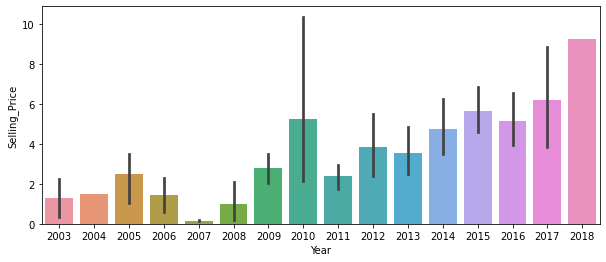

In [16]:
plt.figure(figsize=(10,4))
sns.barplot(x='Year',y='Selling_Price',data=dfc)

* Car prices become expensive with each passing year.

#### Finding outliers

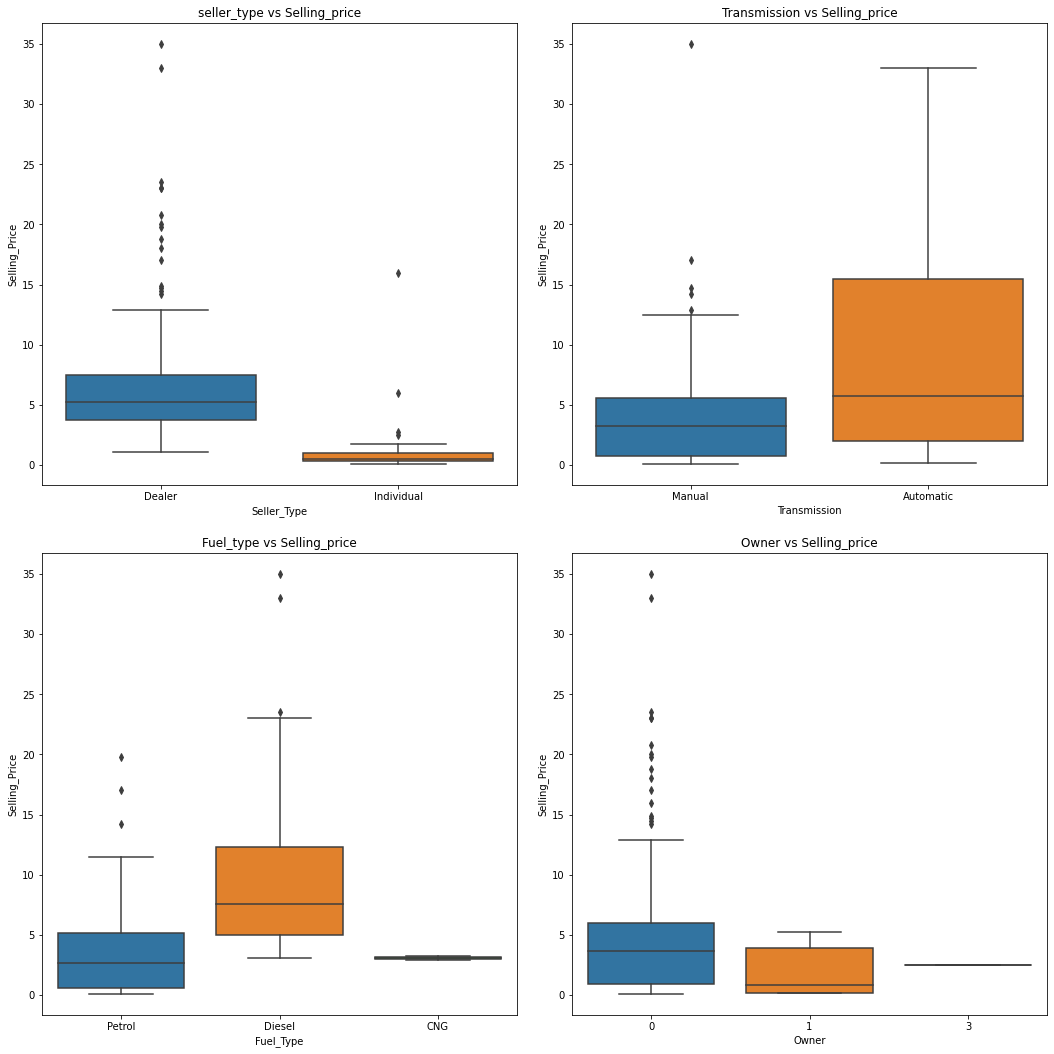

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(15,15))
axes[0,0].set_title('seller_type vs Selling_price')
sns.boxplot(x='Seller_Type',y='Selling_Price',data=dfc,ax=axes[0,0])

axes[1,0].set_title('Fuel_type vs Selling_price')
sns.boxplot(x='Fuel_Type',y='Selling_Price',data=dfc,ax=axes[1,0])

axes[0,1].set_title('Transmission vs Selling_price')
sns.boxplot(x='Transmission',y='Selling_Price',data=dfc,ax=axes[0,1])

axes[1,1].set_title('Owner vs Selling_price')
sns.boxplot(x='Owner',y='Selling_Price',data=dfc,ax=axes[1,1])

plt.tight_layout(pad=2);

* The black dots in the above boxplots are the outliers.

<AxesSubplot:>

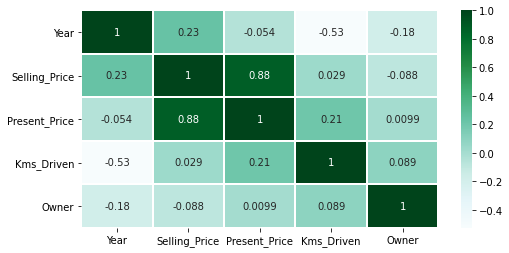

In [18]:
plt.figure(figsize=(8,4))
sns.heatmap(dfc.corr(),annot=True,cmap='BuGn',linewidth=0.2)

* Selling_Price and Present_Price are highly correlated.


<AxesSubplot:xlabel='Selling_Price', ylabel='Present_Price'>

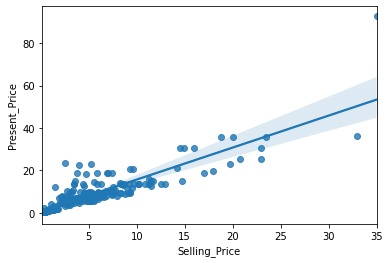

In [19]:
sns.regplot(x='Selling_Price',y='Present_Price',data=dfc)

<AxesSubplot:xlabel='Selling_Price', ylabel='Kms_Driven'>

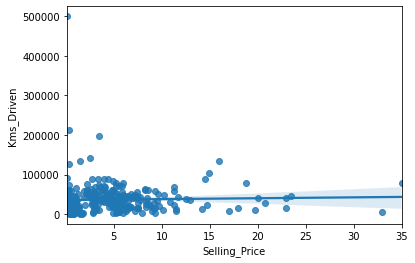

In [20]:
sns.regplot(y='Kms_Driven',x='Selling_Price',data=dfc)

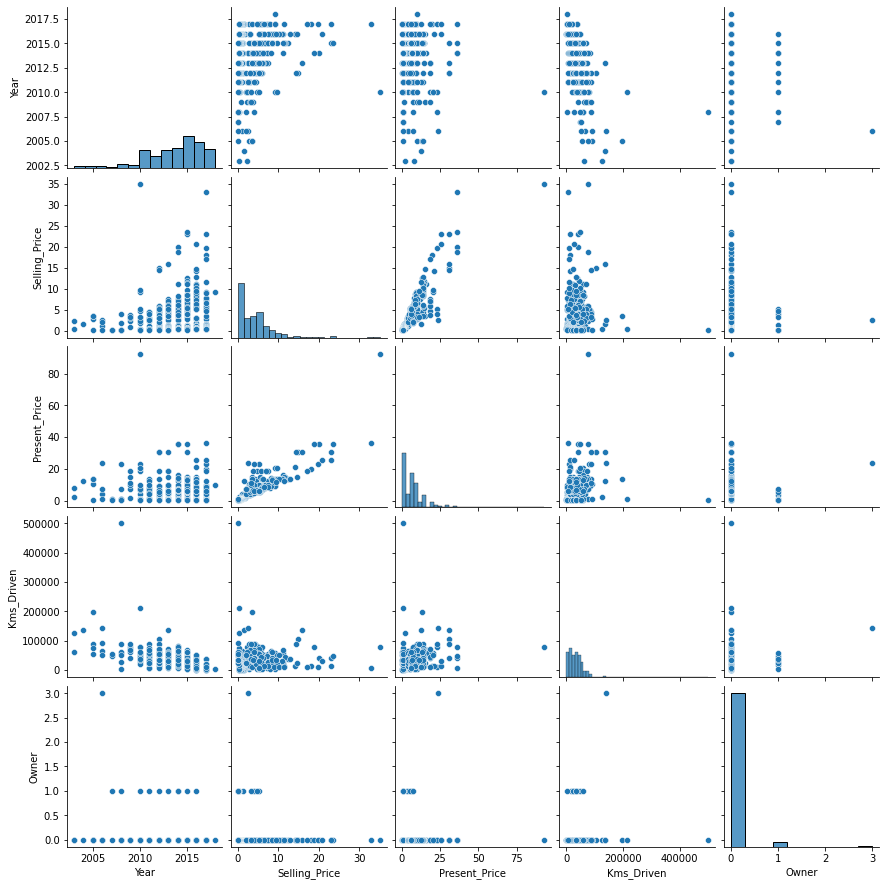

In [21]:
sns.pairplot(dfc)

#### Converting object data to numeric data

In [22]:
dfc = pd.get_dummies(dfc,columns=['Seller_Type','Transmission','Fuel_Type'],drop_first=True)

#### Dropping unnecessary column

In [23]:
dfc.drop(['Car_Name'],axis=1,inplace=True)

In [24]:
dfc

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Seller_Type_Individual,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Petrol
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,0,1,1,0
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,0,1,1,0
297,2015,4.00,5.90,60000,0,0,1,0,1
298,2009,3.35,11.00,87934,0,0,1,0,1
299,2017,11.50,12.50,9000,0,0,1,1,0


* When Individual=0 , we have seller_type as dealer.
* When Manual=0, we have Transmission as automatic.
* When Diesel=0 and Petrol=0, we have Fuel_Type as CNG.

#### Distribution of Selling_Price

c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

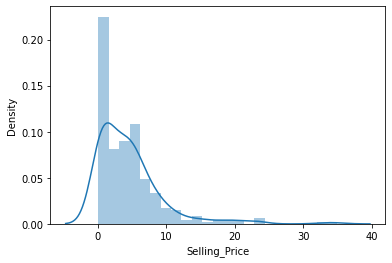

In [25]:
sns.distplot(dfc['Selling_Price'])

* The distribution of Selling Price is positively skewed.

### Splitting the dataset

In [26]:
x = dfc.drop(['Selling_Price'],axis=1)
y = dfc['Selling_Price']

### Training the Model

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

### Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lrm = LinearRegression()

In [31]:
lrm.fit(x_train,y_train)

LinearRegression()

In [32]:
predictions1 = lrm.predict(x_test)

### SVM

In [33]:
from sklearn.svm import SVR

In [34]:
svrm = SVR(kernel='rbf')

In [35]:
svrm.fit(x_train,y_train)

SVR()

In [36]:
predictions2 = svrm.predict(x_test)

### KNN

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:
rmse_value = []

from sklearn import metrics
for i in range (1,30):
    knn = KNeighborsRegressor(n_neighbors=i).fit(x_train,y_train)
    predictions3 = knn.predict(x_test)
    RMSE3=np.sqrt(metrics.mean_squared_error(y_test,predictions3))
    rmse_value.append(RMSE3)
    print('RMSE for k =',i,'is:',RMSE3)

RMSE for k = 1 is: 5.140175850861309
RMSE for k = 2 is: 4.847566657612869
RMSE for k = 3 is: 4.760648804211148
RMSE for k = 4 is: 5.041188696351509
RMSE for k = 5 is: 5.222555977041638
RMSE for k = 6 is: 5.2413744987171516
RMSE for k = 7 is: 5.324877644363075
RMSE for k = 8 is: 5.225264800905628
RMSE for k = 9 is: 5.294342826742351
RMSE for k = 10 is: 5.256387541733285
RMSE for k = 11 is: 5.274087667591066
RMSE for k = 12 is: 5.2784009485898356
RMSE for k = 13 is: 5.279090277854292
RMSE for k = 14 is: 5.263560619120527
RMSE for k = 15 is: 5.272273471709697
RMSE for k = 16 is: 5.309064084153889
RMSE for k = 17 is: 5.325698287828519
RMSE for k = 18 is: 5.3153915489119115
RMSE for k = 19 is: 5.261180723654719
RMSE for k = 20 is: 5.249357958360241
RMSE for k = 21 is: 5.253906790989458
RMSE for k = 22 is: 5.210341550909593
RMSE for k = 23 is: 5.195373574080031
RMSE for k = 24 is: 5.20736681995141
RMSE for k = 25 is: 5.228385042183995
RMSE for k = 26 is: 5.229725076622533
RMSE for k = 27 is:

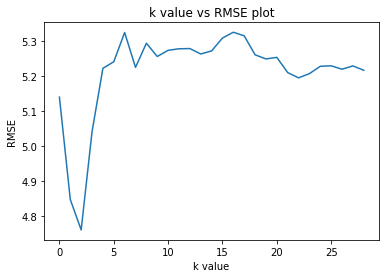

In [39]:
plt.plot(rmse_value)
plt.xlabel('k value')
plt.ylabel('RMSE')

plt.title("k value vs RMSE plot");

* From above graph we conclude that RMSE value is lowest at k=3

In [40]:
knn = KNeighborsRegressor(n_neighbors=3)

In [41]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

### Decision Trees

In [42]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
dt = DecisionTreeRegressor()

In [44]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [45]:
predictions4 = dt.predict(x_test)

### Random Forest

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
rmse_value = []

from sklearn import metrics
for i in range (20,151,10):
    rf = RandomForestRegressor(n_estimators=i,random_state=0).fit(x_train,y_train)
    predictions6 = rf.predict(x_test)
    RMSE_RF=np.sqrt(metrics.mean_squared_error(y_test,predictions6))
    rmse_value.append(RMSE_RF)
    print('RMSE for n_estimators =',i,'is:',RMSE_RF)

RMSE for n_estimators = 20 is: 1.871596937703795
RMSE for n_estimators = 30 is: 1.8585929737237548
RMSE for n_estimators = 40 is: 1.8979920082008896
RMSE for n_estimators = 50 is: 1.9114418182211157
RMSE for n_estimators = 60 is: 1.9145734473206257
RMSE for n_estimators = 70 is: 1.8902401029865952
RMSE for n_estimators = 80 is: 1.9080253643874414
RMSE for n_estimators = 90 is: 1.9202956266035724
RMSE for n_estimators = 100 is: 1.9230692032096321
RMSE for n_estimators = 110 is: 1.9321270582303847
RMSE for n_estimators = 120 is: 1.8992041090721825
RMSE for n_estimators = 130 is: 1.9029315048359734
RMSE for n_estimators = 140 is: 1.9210231231957104
RMSE for n_estimators = 150 is: 1.9175209006925027


* RMSE value is least for n_estimators=30

In [48]:
rf = RandomForestRegressor(n_estimators=30,random_state=0)

In [49]:
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=30, random_state=0)

In [50]:
predictions5 = rf.predict(x_test)

### GridSearchCV

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
# defining parameter range 
param_grid = {"n_estimators"      :[10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False]}  

In [53]:
grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, n_jobs=-1,cv=10) 

In [54]:
grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]})

In [55]:
predictions6 = grid.predict(x_test)

### Predicting Test Data

c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Predicted values vs True values using Linear regression')

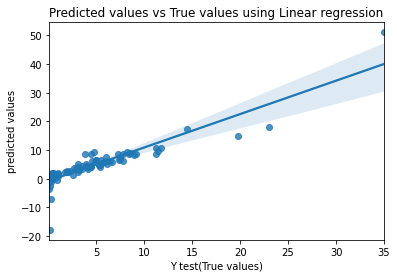

In [56]:
sns.regplot(y_test,predictions1)
plt.xlabel('Y test(True values)')
plt.ylabel('predicted values')
plt.title('Predicted values vs True values using Linear regression')

c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Predicted values vs True values using SVM')

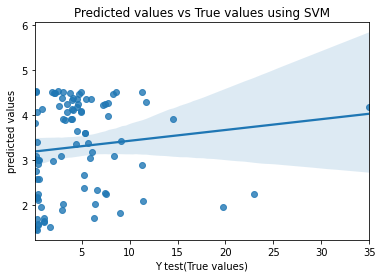

In [57]:
sns.regplot(y_test,predictions2)
plt.xlabel('Y test(True values)')
plt.ylabel('predicted values')
plt.title('Predicted values vs True values using SVM')

c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Predicted values vs True values using KNN')

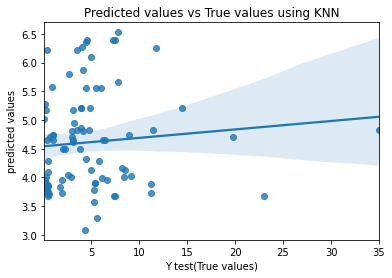

In [58]:
sns.regplot(y_test,predictions3)
plt.xlabel('Y test(True values)')
plt.ylabel('predicted values')
plt.title('Predicted values vs True values using KNN')

c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Predicted values vs True values using DecisionTrees')

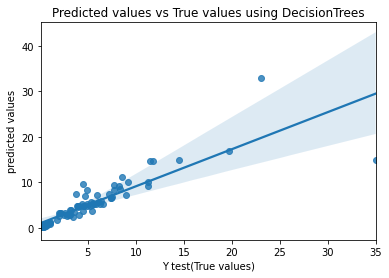

In [59]:
sns.regplot(y_test,predictions4)
plt.xlabel('Y test(True values)')
plt.ylabel('predicted values')
plt.title('Predicted values vs True values using DecisionTrees')

c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Predicted values vs True values using RandomForest')

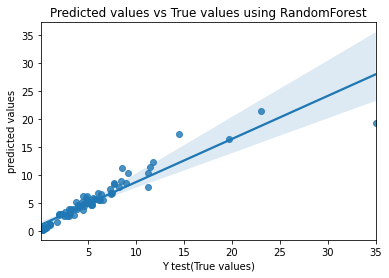

In [60]:
sns.regplot(y_test,predictions5)
plt.xlabel('Y test(True values)')
plt.ylabel('predicted values')
plt.title('Predicted values vs True values using RandomForest')

c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Predicted values vs True values using GridSearchCV')

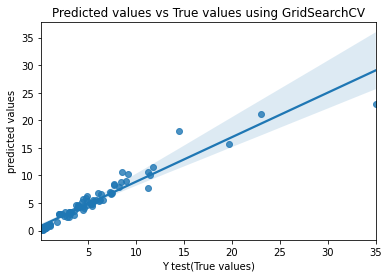

In [61]:
sns.regplot(y_test,predictions6)
plt.xlabel('Y test(True values)')
plt.ylabel('predicted values')
plt.title('Predicted values vs True values using GridSearchCV')

INFERENCE:

* FROM THE ABOVE REGRESSION PLOTS WE CAN INFER THAT IN SVM AND KNN MODELS PREDICTIONS ARE MUCH FARTHER FROM THE REAL DATA POINTS. HENCE, THESE MODELS ARE NOT GOOD FOR THE GIVEN DATASET.

### Evaluating the model

In [62]:
from sklearn import metrics

#### MAE 

In [63]:
print('MAE using Linear regression Model:',metrics.mean_absolute_error(y_test,predictions1))
print('MAE using SVM: ',metrics.mean_absolute_error(y_test,predictions2))
print('MAE using KNN: ',metrics.mean_absolute_error(y_test,predictions3))
print('MAE using DecisionTrees: ',metrics.mean_absolute_error(y_test,predictions4))
print('MAE using RandomForest: ',metrics.mean_absolute_error(y_test,predictions5))
print('MAE using GridSearchCV: ',metrics.mean_absolute_error(y_test,predictions6))

MAE using Linear regression Model: 1.4883023038407341
MAE using SVM:  3.1030194634394723
MAE using KNN:  3.4034252873563218
MAE using DecisionTrees:  1.0634444444444446
MAE using RandomForest:  0.7053555555555555
MAE using GridSearchCV:  0.6728500992063492


* GridSearchCV Model has the least MAE.

#### MSE

In [64]:
print('MSE using Linear regression Model:',metrics.mean_squared_error(y_test,predictions1))
print('MSE using SVM: ',metrics.mean_squared_error(y_test,predictions2))
print('MSE using KNN: ',metrics.mean_squared_error(y_test,predictions3))
print('MSE using DecisionTrees: ',metrics.mean_squared_error(y_test,predictions4))
print('MSE using RandomForest: ',metrics.mean_squared_error(y_test,predictions5))
print('MSE using GridSearchCV: ',metrics.mean_squared_error(y_test,predictions6))

MSE using Linear regression Model: 9.340942664132937
MSE using SVM:  28.983626702834524
MSE using KNN:  27.21676021403092
MSE using DecisionTrees:  7.038767777777779
MSE using RandomForest:  3.4543678419753094
MSE using GridSearchCV:  2.4419052481805132


#### RMSE

In [65]:
print('RMSE using Linear regression Model:',np.sqrt(metrics.mean_squared_error(y_test,predictions1)))
print('RMSE using SVM: ',np.sqrt(metrics.mean_squared_error(y_test,predictions2)))
print('RMSE using KNN: ',np.sqrt(metrics.mean_squared_error(y_test,predictions3)))
print('RMSE using DecisionTrees: ',np.sqrt(metrics.mean_squared_error(y_test,predictions4)))
print('RMSE using RandomForest: ',np.sqrt(metrics.mean_squared_error(y_test,predictions5)))
print('RMSE using GridSearchCV: ',np.sqrt(metrics.mean_squared_error(y_test,predictions6)))

RMSE using Linear regression Model: 3.05629557865939
RMSE using SVM:  5.383644370018745
RMSE using KNN:  5.216968488886138
RMSE using DecisionTrees:  2.653067616510702
RMSE using RandomForest:  1.8585929737237548
RMSE using GridSearchCV:  1.5626596712593928


* GridSearhCV Model has the least RMSE value.

#### Explained Variance Score

In [66]:
print('Explained variance score with Linear Regression Model: ',metrics.explained_variance_score(y_test,predictions1))
print('Explained variance score with SVM: ',metrics.explained_variance_score(y_test,predictions2))
print('Explained variance score with KNN: ',metrics.explained_variance_score(y_test,predictions3))
print('Explained variance score with DecisionTrees: ',metrics.explained_variance_score(y_test,predictions4))
print('Explained variance score with RandomForest: ',metrics.explained_variance_score(y_test,predictions5))
print('Explained variance score with GridSearchCV: ',metrics.explained_variance_score(y_test,predictions6))

Explained variance score with Linear Regression Model:  0.6576612071417952
Explained variance score with SVM:  0.009287080311891738
Explained variance score with KNN:  0.0027085611589828806
Explained variance score with DecisionTrees:  0.7426769957257766
Explained variance score with RandomForest:  0.8737153325267983
Explained variance score with GridSearchCV:  0.9109979146883226


* Explained Variance is highest in GridSearchCV Model.

### Residuals

c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot using Linear Regression Model')

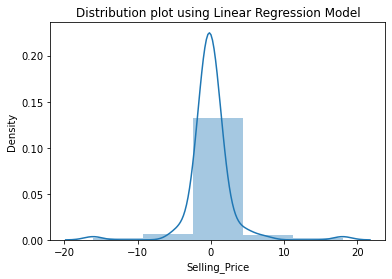

In [67]:
sns.distplot(y_test-predictions1,bins=5)
plt.title('Distribution plot using Linear Regression Model')

* Distribution using Linear Regression model is approximately Normal.

c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot using SVM')

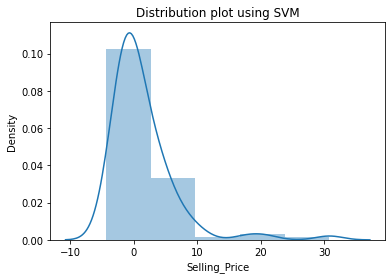

In [68]:
sns.distplot(y_test-predictions2,bins=5)
plt.title('Distribution plot using SVM')

* Distribution using SVM model is positively skewed.

c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot using KNN')

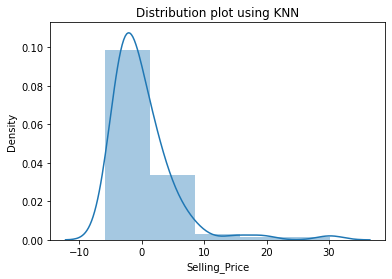

In [69]:
sns.distplot(y_test-predictions3,bins=5)
plt.title('Distribution plot using KNN')

* Distribution using KNN model is positively skewed.

c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot using DecisionTrees')

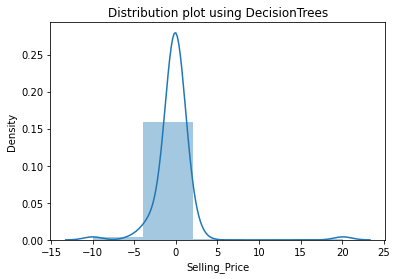

In [70]:
sns.distplot(y_test-predictions4,bins=5)
plt.title('Distribution plot using DecisionTrees')

* Distribution using DecisionTrees model is Normal.

c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot using RandomForest')

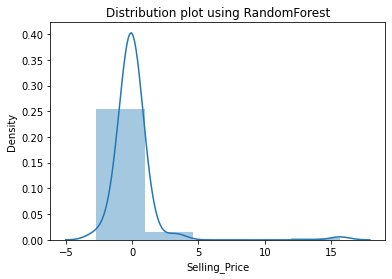

In [71]:
sns.distplot(y_test-predictions5,bins=5)
plt.title('Distribution plot using RandomForest')

* Distribution using RandomForest model is Normal.

c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot using GridSearchCV on RandomForest')

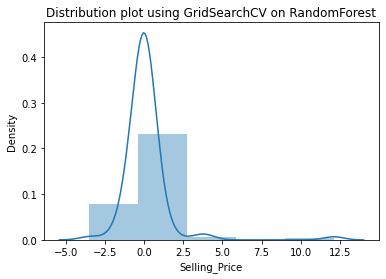

In [72]:
sns.distplot(y_test-predictions6,bins=5)
plt.title('Distribution plot using GridSearchCV on RandomForest')

* Distribution using GridSearchCV on RandomForest model is normal.

### Bias

In [73]:
def get_bias(predicted_values,true_values):
    return np.round(np.mean((predicted_values - true_values)**2),0)
bias1 = get_bias(predictions1,y_test)
print('Bias using Linear Regression:',bias1)
bias2 = get_bias(predictions2,y_test)
print('Bias using SVM:',bias2)
bias3 = get_bias(predictions3,y_test)
print('Bias using KNN:',bias3)
bias4 = get_bias(predictions4,y_test)
print('Bias using DecisionTrees:',bias4)
bias5 = get_bias(predictions5,y_test)
print('Bias using RandomForest:',bias5)
bias6 = get_bias(predictions6,y_test)
print('Bias using GridSearchCV:',bias6)

Bias using Linear Regression: 9.0
Bias using SVM: 29.0
Bias using KNN: 27.0
Bias using DecisionTrees: 7.0
Bias using RandomForest: 3.0
Bias using GridSearchCV: 2.0


* GridSearchCV Model gives us the least bias.

### R squared Score

In [74]:
print('R2 Score:', metrics.r2_score(y_test, predictions1))
print('R2 Score using SVM:', metrics.r2_score(y_test, predictions2))
print('R2 Score using KNN:', metrics.r2_score(y_test, predictions3))
print('R2 Score using DecisionTrees:', metrics.r2_score(y_test, predictions4))
print('R2 Score using RandomForest:', metrics.r2_score(y_test, predictions5))
print('R2 Score using GridSearchCV:', metrics.r2_score(y_test, predictions6))

R2 Score: 0.6576364489340596
R2 Score using SVM: -0.06230577764424439
R2 Score using KNN: 0.002453284381575438
R2 Score using DecisionTrees: 0.7420155954086238
R2 Score using RandomForest: 0.8733907611265234
R2 Score using GridSearchCV: 0.9104994664677948


* R squared Score is the highest in GridSearchCV Model.

### Model Score

In [75]:
print('Score using Linear Regression Model is ',lrm.score(x_test,y_test))
print('Score using SVM Model is ',svrm.score(x_test, y_test))
print('Score using KNN Model is ',knn.score(x_test, y_test))
print('Score using DecisionTrees Model is ',dt.score(x_test, y_test))
print('Score using RandomForest Model is ',rf.score(x_test, y_test))
print('Score using GridSearchCV Model is ',grid.score(x_test,y_test))

Score using Linear Regression Model is  0.6576364489340596
Score using SVM Model is  -0.06230577764424439
Score using KNN Model is  0.16932889260090966
Score using DecisionTrees Model is  0.7420155954086238
Score using RandomForest Model is  0.8733907611265234
Score using GridSearchCV Model is  0.9104994664677948


* Model Score is the highest in GridSearchCV Model.

## Conclusion

Out Of all the 6 Models GridSearchCV used on RandomForest Model has been found to be the best with least RMSE value and least bias as 1.563 and 2.0 respectively and highest Explained variance Score and R squared score as 0.911 and 0.911 respectively